# Chapter 1 – The Machine Learning landscape


When most people hear “Machine Learning,” they picture a robot: a dependable butler or a deadly Terminator, depending on whom you ask. But Machine Learning is not just a futuristic fantasy; it’s already here. In fact, it has been around for decades in some specialized applications, such as Optical Character Recognition (OCR). But the first ML application that really became mainstream, improving the lives of hundreds of millions of people, took over the world back in the 1990s: the spam filter. It’s not exactly a self-aware Skynet, but it does technically qualify as Machine Learning (it has actually learned so well that you seldom need to flag an email as spam anymore). It was followed by hundreds of ML applications that now quietly power hundreds of products and features that you use regularly, from better recommendations to voice search.

Where does Machine Learning start and where does it end? What exactly does it mean for a machine to learn something? If I download a copy of Wikipedia, has my computer really learned something? Is it suddenly smarter? In this chapter we will start by clarifying what Machine Learning is and why you may want to use it.

Then, before we set out to explore the Machine Learning continent, we will take a look at the map and learn about the main regions and the most notable landmarks: supervised versus unsupervised learning, online versus batch learning, instance-based versus model-based learning. Then we will look at the workflow of a typical ML project, discuss the main challenges you may face, and cover how to evaluate and fine-tune a Machine Learning system.

This chapter introduces a lot of fundamental concepts (and jargon) that every data scientist should know by heart. It will be a high-level overview (it’s the only chapter without much code), all rather simple, but you should make sure everything is crystal clear to you before continuing on to the rest of the book. So grab a coffee and let’s get started!

**What Is Machine Learning?**

Machine Learning is the science (and art) of programming computers so they can learn from data.

Here is a slightly more general definition:

>[Machine Learning is the] field of study that gives computers the ability to learn without being explicitly programmed.

>Arthur Samuel, 1959

And a more engineering-oriented one:

>A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E.

>Tom Mitchell, 1997

Your spam filter is a Machine Learning program that, given examples of spam emails (e.g., flagged by users) and examples of regular (nonspam, also called “ham”) emails, can learn to flag spam. The examples that the system uses to learn are called the training set. Each training example is called a training instance (or sample). In this case, the task T is to flag spam for new emails, the experience E is the training data, and the performance measure P needs to be defined; for example, you can use the ratio of correctly classified emails. This particular performance measure is called accuracy, and it is often used in classification tasks.

If you just download a copy of Wikipedia, your computer has a lot more data, but it is not suddenly better at any task. Thus, downloading a copy of Wikipedia is not Machine Learning.

**Why Use Machine Learning?**

Consider how you would write a spam filter using traditional programming techniques (Figure 1-1):

First you would consider what spam typically looks like. You might notice that some words or phrases (such as “4U,” “credit card,” “free,” and “amazing”) tend to come up a lot in the subject line. Perhaps you would also notice a few other patterns in the sender’s name, the email’s body, and other parts of the email.

You would write a detection algorithm for each of the patterns that you noticed, and your program would flag emails as spam if a number of these patterns were detected.

You would test your program and repeat steps 1 and 2 until it was good enough to launch.

<img src="./chapters/1/mls2_0101.png">

<div style="text-align:center"> Figure 1-1. The traditional approach </div>

Since the problem is difficult, your program will likely become a long list of complex rules—pretty hard to maintain.

In contrast, a spam filter based on Machine Learning techniques automatically learns which words and phrases are good predictors of spam by detecting unusually frequent patterns of words in the spam examples compared to the ham examples (Figure 1-2). The program is much shorter, easier to maintain, and most likely more accurate.

What if spammers notice that all their emails containing “4U” are blocked? They might start writing “For U” instead. A spam filter using traditional programming techniques would need to be updated to flag “For U” emails. If spammers keep working around your spam filter, you will need to keep writing new rules forever.

In contrast, a spam filter based on Machine Learning techniques automatically notices that “For U” has become unusually frequent in spam flagged by users, and it starts flagging them without your intervention (Figure 1-3).

<img src="./chapters/1/mls2_0102.png">
<div style="text-align:center"> Figure 1-2. The Machine Learning approach </div>
<img src="./chapters/1/mls2_0103.png">
<div style="text-align:center"> Figure 1-3. Automatically adapting to change </div>

Another area where Machine Learning shines is for problems that either are too complex for traditional approaches or have no known algorithm. For example, consider speech recognition. Say you want to start simple and write a program capable of distinguishing the words “one” and “two.” You might notice that the word “two” starts with a high-pitch sound (“T”), so you could hardcode an algorithm that measures high-pitch sound intensity and use that to distinguish ones and twos⁠—but obviously this technique will not scale to thousands of words spoken by millions of very different people in noisy environments and in dozens of languages. The best solution (at least today) is to write an algorithm that learns by itself, given many example recordings for each word.

Finally, Machine Learning can help humans learn (Figure 1-4). ML algorithms can be inspected to see what they have learned (although for some algorithms this can be tricky). For instance, once a spam filter has been trained on enough spam, it can easily be inspected to reveal the list of words and combinations of words that it believes are the best predictors of spam. Sometimes this will reveal unsuspected correlations or new trends, and thereby lead to a better understanding of the problem. Applying ML techniques to dig into large amounts of data can help discover patterns that were not immediately apparent. This is called *data mining*.

<img src="./chapters/1/mls2_0104.png">
<div style="text-align:center"> Figure 1-4. Machine Learning can help humans learn </div>

To summarize, Machine Learning is great for:

- Problems for which existing solutions require a lot of fine-tuning or long lists of rules: one Machine Learning algorithm can often simplify code and perform better than the traditional approach.

- Complex problems for which using a traditional approach yields no good solution: the best Machine Learning techniques can perhaps find a solution.

- Fluctuating environments: a Machine Learning system can adapt to new data.

- Getting insights about complex problems and large amounts of data.

**Types of Machine Learning Systems**

There are so many different types of Machine Learning systems that it is useful to classify them in broad categories, based on the following criteria:

- Whether or not they are trained with human supervision (supervised, unsupervised, semisupervised, and Reinforcement Learning)

- Whether or not they can learn incrementally on the fly (online versus batch learning)

- Whether they work by simply comparing new data points to known data points, or instead by detecting patterns in the training data and building a predictive model, much like scientists do (instance-based versus model-based learning)

These criteria are not exclusive; you can combine them in any way you like. For example, a state-of-the-art spam filter may learn on the fly using a deep neural network model trained using examples of spam and ham; this makes it an online, model-based, supervised learning system.

Let’s look at each of these criteria a bit more closely.

**Supervised/Unsupervised Learning**

Machine Learning systems can be classified according to the amount and type of supervision they get during training. There are four major categories: supervised learning, unsupervised learning, semisupervised learning, and Reinforcement Learning.

**SUPERVISED LEARNING**

In supervised learning, the training set you feed to the algorithm includes the desired solutions, called labels (Figure 1-5).

<img src="./chapters/1/mls2_0105.png">
<div style="text-align:center"> Figure 1-5. A labeled training set for spam classification (an example of supervised learning) </div>

A typical supervised learning task is classification. The spam filter is a good example of this: it is trained with many example emails along with their class (spam or ham), and it must learn how to classify new emails.

Another typical task is to predict a target numeric value, such as the price of a car, given a set of features (mileage, age, brand, etc.) called predictors. This sort of task is called *regression* (Figure 1-6). To train the system, you need to give it many examples of cars, including both their predictors and their labels (i.e., their prices).

> Note: In Machine Learning an **attribute** is a data type (e.g., “mileage”), while a **feature** has several meanings, depending on the context, but generally means an attribute plus its value (e.g., “mileage = 15,000”). Many people use the words attribute and feature interchangeably.


Note that some regression algorithms can be used for classification as well, and vice versa. For example, Logistic Regression is commonly used for classification, as it can output a value that corresponds to the probability of belonging to a given class (e.g., 20% chance of being spam).

<img src="./chapters/1/mls2_0106.png">
<div style="text-align:center"> Figure 1-6. A regression problem: predict a value, given an input feature (there are usually multiple input features, and sometimes multiple output values) </div>

Here are some of the most important supervised learning algorithms (covered in this book):

- k-Nearest Neighbors

- Linear Regression

- Logistic Regression

- Support Vector Machines (SVMs)

- Decision Trees and Random Forests

- Neural networks2

**UNSUPERVISED LEARNING**  


In unsupervised learning, as you might guess, the training data is unlabeled (Figure 1-7). The system tries to learn without a teacher.

<img src="./chapters/1/mls2_0107.png">
<div style="text-align:center"> Figure 1-7. An unlabeled training set for unsupervised learning </div>

Here are some of the most important unsupervised learning algorithms (most of these are covered in Chapters 8 and 9):

- Clustering

  - K-Means

  - DBSCAN

  - Hierarchical Cluster Analysis (HCA)

- Anomaly detection and novelty detection

  - One-class SVM

  - Isolation Forest

- Visualization and dimensionality reduction

  - Principal Component Analysis (PCA)

  - Kernel PCA

  - Locally Linear Embedding (LLE)

  - t-Distributed Stochastic Neighbor Embedding (t-SNE)

- Association rule learning

  - Apriori

  - Eclat

For example, say you have a lot of data about your blog’s visitors. You may want to run a clustering algorithm to try to detect groups of similar visitors (Figure 1-8). At no point do you tell the algorithm which group a visitor belongs to: it finds those connections without your help. For example, it might notice that 40% of your visitors are males who love comic books and generally read your blog in the evening, while 20% are young sci-fi lovers who visit during the weekends. If you use a *hierarchical clustering* algorithm, it may also subdivide each group into smaller groups. This may help you target your posts for each group.

<img src="./chapters/1/mls2_0108.png">
<div style="text-align:center"> Figure 1-8. Clustering </div>

*Visualization* algorithms are also good examples of unsupervised learning algorithms: you feed them a lot of complex and unlabeled data, and they output a 2D or 3D representation of your data that can easily be plotted (Figure 1-9). These algorithms try to preserve as much structure as they can (e.g., trying to keep separate clusters in the input space from overlapping in the visualization) so that you can understand how the data is organized and perhaps identify unsuspected patterns.

<img src="./chapters/1/mls2_0109.png">
<div style="text-align:center"> Figure 1-9. Example of a t-SNE visualization highlighting semantic clusters </div>

A related task is *dimensionality reduction*, in which the goal is to simplify the data without losing too much information. One way to do this is to merge several correlated features into one. For example, a car’s mileage may be strongly correlated with its age, so the dimensionality reduction algorithm will merge them into one feature that represents the car’s wear and tear. This is called *feature extraction*.

Yet another important unsupervised task is *anomaly detection*—for example, detecting unusual credit card transactions to prevent fraud, catching manufacturing defects, or automatically removing outliers from a dataset before feeding it to another learning algorithm. The system is shown mostly normal instances during training, so it learns to recognize them; then, when it sees a new instance, it can tell whether it looks like a normal one or whether it is likely an anomaly (see Figure 1-10). A very similar task is *novelty detection*: it aims to detect new instances that look different from all instances in the training set. This requires having a very “clean” training set, devoid of any instance that you would like the algorithm to detect. For example, if you have thousands of pictures of dogs, and 1% of these pictures represent Chihuahuas, then a novelty detection algorithm should not treat new pictures of Chihuahuas as novelties. On the other hand, anomaly detection algorithms may consider these dogs as so rare and so different from other dogs that they would likely classify them as anomalies (no offense to Chihuahuas).

<img src="./chapters/1/mls2_0110.png">
<div style="text-align:center"> Figure 1-10. Anomaly detection </div>

Finally, another common unsupervised task is *association rule learning*, in which the goal is to dig into large amounts of data and discover interesting relations between attributes. For example, suppose you own a supermarket. Running an association rule on your sales logs may reveal that people who purchase barbecue sauce and potato chips also tend to buy steak. Thus, you may want to place these items close to one another.

**SEMISUPERVISED LEARNING**


Since labeling data is usually time-consuming and costly, you will often have plenty of unlabeled instances, and few labeled instances. Some algorithms can deal with data that’s partially labeled. This is called *semisupervised learning* (Figure 1-11).

<img src="./chapters/1/mls2_0111.png">
<div style="text-align:center"> Figure 1-11. Semisupervised learning with two classes (triangles and squares): the unlabeled examples (circles) help classify a new instance (the cross) into the triangle class rather than the square class, even though it is closer to the labeled squares </div>

Some photo-hosting services, such as Google Photos, are good examples of this. Once you upload all your family photos to the service, it automatically recognizes that the same person A shows up in photos 1, 5, and 11, while another person B shows up in photos 2, 5, and 7. This is the unsupervised part of the algorithm (clustering). Now all the system needs is for you to tell it who these people are. Just add one label per person and it is able to name everyone in every photo, which is useful for searching photos.

Most semisupervised learning algorithms are combinations of unsupervised and supervised algorithms. For example, *deep belief networks* (DBNs) are based on unsupervised components called *restricted Boltzmann machines* (RBMs) stacked on top of one another. RBMs are trained sequentially in an unsupervised manner, and then the whole system is fine-tuned using supervised learning techniques.

**REINFORCEMENT LEARNING**  


*Reinforcement Learning* is a very different beast. The learning system, called an *agent* in this context, can observe the environment, select and perform actions, and get *rewards* in return (or *penalties* in the form of negative rewards, as shown in Figure 1-12). It must then learn by itself what is the best strategy, called a *policy*, to get the most reward over time. A policy defines what action the agent should choose when it is in a given situation.

<img src="./chapters/1/mls2_0112.png">
<div style="text-align:center"> Figure 1-12. Reinforcement Learning </div>

For example, many robots implement Reinforcement Learning algorithms to learn how to walk. DeepMind’s AlphaGo program is also a good example of Reinforcement Learning: it made the headlines in May 2017 when it beat the world champion Ke Jie at the game of Go. It learned its winning policy by analyzing millions of games, and then playing many games against itself. Note that learning was turned off during the games against the champion; AlphaGo was just applying the policy it had learned.

**Batch and Online Learning**

Another criterion used to classify Machine Learning systems is whether or not the system can learn incrementally from a stream of incoming data.

**BATCH LEARNING**  


In *batch learning*, the system is incapable of learning incrementally: it must be trained using all the available data. This will generally take a lot of time and computing resources, so it is typically done offline. First the system is trained, and then it is launched into production and runs without learning anymore; it just applies what it has learned. This is called offline learning.

If you want a batch learning system to know about new data (such as a new type of spam), you need to train a new version of the system from scratch on the full dataset (not just the new data, but also the old data), then stop the old system and replace it with the new one.

Fortunately, the whole process of training, evaluating, and launching a Machine Learning system can be automated fairly easily (as shown in Figure 1-3), so even a batch learning system can adapt to change. Simply update the data and train a new version of the system from scratch as often as needed.

This solution is simple and often works fine, but training using the full set of data can take many hours, so you would typically train a new system only every 24 hours or even just weekly. If your system needs to adapt to rapidly changing data (e.g., to predict stock prices), then you need a more reactive solution.

Also, training on the full set of data requires a lot of computing resources (CPU, memory space, disk space, disk I/O, network I/O, etc.). If you have a lot of data and you automate your system to train from scratch every day, it will end up costing you a lot of money. If the amount of data is huge, it may even be impossible to use a batch learning algorithm.

Finally, if your system needs to be able to learn autonomously and it has limited resources (e.g., a smartphone application or a rover on Mars), then carrying around large amounts of training data and taking up a lot of resources to train for hours every day is a showstopper.

Fortunately, a better option in all these cases is to use algorithms that are capable of learning incrementally.

**ONLINE LEARNING** 


In *online learning*, you train the system incrementally by feeding it data instances sequentially, either individually or in small groups called *mini-batches*. Each learning step is fast and cheap, so the system can learn about new data on the fly, as it arrives (see Figure 1-13).

<img src="./chapters/1/mls2_0113.png">
<div style="text-align:center"> Figure 1-13. In online learning, a model is trained and launched into production, and then it keeps learning as new data comes in </div>

Online learning is great for systems that receive data as a continuous flow (e.g., stock prices) and need to adapt to change rapidly or autonomously. It is also a good option if you have limited computing resources: once an online learning system has learned about new data instances, it does not need them anymore, so you can discard them (unless you want to be able to roll back to a previous state and “replay” the data). This can save a huge amount of space.

Online learning algorithms can also be used to train systems on huge datasets that cannot fit in one machine’s main memory (this is called *out-of-core* learning). The algorithm loads part of the data, runs a training step on that data, and repeats the process until it has run on all of the data (see Figure 1-14).

One important parameter of online learning systems is how fast they should adapt to changing data: this is called the *learning rate*. If you set a high learning rate, then your system will rapidly adapt to new data, but it will also tend to quickly forget the old data (you don’t want a spam filter to flag only the latest kinds of spam it was shown). Conversely, if you set a low learning rate, the system will have more inertia; that is, it will learn more slowly, but it will also be less sensitive to noise in the new data or to sequences of nonrepresentative data points (outliers).

<img src="./chapters/1/mls2_0114.png">
<div style="text-align:center"> Figure 1-14. Using online learning to handle huge datasets </div>

A big challenge with online learning is that if bad data is fed to the system, the system’s performance will gradually decline. If it’s a live system, your clients will notice. For example, bad data could come from a malfunctioning sensor on a robot, or from someone spamming a search engine to try to rank high in search results. To reduce this risk, you need to monitor your system closely and promptly switch learning off (and possibly revert to a previously working state) if you detect a drop in performance. You may also want to monitor the input data and react to abnormal data (e.g., using an anomaly detection algorithm).

**Instance-Based Versus Model-Based Learning**  


One more way to categorize Machine Learning systems is by how they *generalize*. Most Machine Learning tasks are about making predictions. This means that given a number of training examples, the system needs to be able to make good predictions for (generalize to) examples it has never seen before. Having a good performance measure on the training data is good, but insufficient; the true goal is to perform well on new instances.

There are two main approaches to generalization: instance-based learning and model-based learning.

**INSTANCE-BASED LEARNING**  


Possibly the most trivial form of learning is simply to learn by heart. If you were to create a spam filter this way, it would just flag all emails that are identical to emails that have already been flagged by users—not the worst solution, but certainly not the best.

Instead of just flagging emails that are identical to known spam emails, your spam filter could be programmed to also flag emails that are very similar to known spam emails. This requires a *measure of similarity* between two emails. A (very basic) similarity measure between two emails could be to count the number of words they have in common. The system would flag an email as spam if it has many words in common with a known spam email.

This is called *instance-based learning*: the system learns the examples by heart, then generalizes to new cases by using a similarity measure to compare them to the learned examples (or a subset of them). For example, in Figure 1-15 the new instance would be classified as a triangle because the majority of the most similar instances belong to that class.

<img src="./chapters/1/mls2_0115.png">
<div style="text-align:center"> Figure 1-15. Instance-based learning </div>

**MODEL-BASED LEARNING**  


Another way to generalize from a set of examples is to build a model of these examples and then use that model to make *predictions*. This is called *model-based learning* (Figure 1-16).

<img src="./chapters/1/mls2_0116.png">
<div style="text-align:center"> Figure 1-16. Model-based learning </div>

For example, suppose you want to know if money makes people happy, so you download the Better Life Index data from the OECD’s website and stats about gross domestic product (GDP) per capita from the IMF’s website. Then you join the tables and sort by GDP per capita. Table 1-1 shows an excerpt of what you get.

Table 1-1. Does money make people happier?

|Country     | GDP per capita (USD) | Life satisfaction |
| :----------- | :----------- | :----------- |
| Hungary      | 12,240       | 4.9 |
| Korea   | 27,195        | 5.8 |
| France   | 37,675       | 6.5 |
| Australia |  50,962  | 7.3 |
| United States |  55,805  | 7.2 |


Let’s plot the data for these countries (Figure 1-17).

<img src="./chapters/1/mls2_0117.png">
<div style="text-align:center"> Figure 1-17. Do you see a trend here? </div>

There does seem to be a trend here! Although the data is *noisy* (i.e., partly random), it looks like life satisfaction goes up more or less linearly as the country’s GDP per capita increases. So you decide to model life satisfaction as a linear function of GDP per capita. This step is called *model selection*: you selected a linear model of life satisfaction with just one attribute, GDP per capita (Equation 1-1).

*Equation 1-1. A simple linear model*

$$\text{life_satisfaction}=\theta_0+\theta_1\times \text{GDP_per_capita}$$

This model has two model parameters, $\theta_0$ and $\theta_1$. By tweaking these parameters, you can make your model represent any linear function, as shown in Figure 1-18.

<img src="./chapters/1/mls2_0118.png">
<div style="text-align:center"> Figure 1-18. A few possible linear models </div>

Before you can use your model, you need to define the parameter values $\theta_0$ and $\theta_1$. How can you know which values will make your model perform best? To answer this question, you need to specify a performance measure. You can either define a utility function (or fitness function) that measures how good your model is, or you can define a cost function that measures how bad it is. For Linear Regression problems, people typically use a cost function that measures the distance between the linear model’s predictions and the training examples; the objective is to minimize this distance.

This is where the Linear Regression algorithm comes in: you feed it your training examples, and it finds the parameters that make the linear model fit best to your data. This is called *training* the model. In our case, the algorithm finds that the optimal parameter values are $\theta_0 = 4.85$ and $\theta_1 = 4.91 \times 10^{–5}$.

>WARNING

>Confusingly, the same word “model” can refer to a *type of model* (e.g., Linear Regression), to a *fully specified model architecture* (e.g., Linear Regression with one input and one output), or to the *final trained model* ready to be used for predictions (e.g., Linear Regression with one input and one output, using $\theta_0 = 4.85$ and $\theta_1 = 4.91 \times 10^{–5}$). Model selection consists in choosing the type of model and fully specifying its architecture. Training a model means running an algorithm to find the model parameters that will make it best fit the training data (and hopefully make good predictions on new data).

Now the model fits the training data as closely as possible (for a linear model), as you can see in Figure 1-19.

<img src="./chapters/1/mls2_0119.png">
<div style="text-align:center"> Figure 1-19. The linear model that fits the training data best </div>

You are finally ready to run the model to make predictions. For example, say you want to know how happy Cypriots are, and the OECD data does not have the answer. Fortunately, you can use your model to make a good prediction: you look up Cyprus’s GDP per capita, find $22,587, and then apply your model and find that life satisfaction is likely to be somewhere around 4.85 + 22,587 × 4.91 × 10-5 = 5.96.

To what your appetite, Example 1-1 shows the Python code that loads the data, prepares it,6 creates a scatterplot for visualization, and then trains a linear model and makes a prediction.

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/01_the_machine_learning_landscape.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

### Example 1-1. Training and running a linear model using Scikit-Learn

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data. It's a bit too long and boring and it's not specific to Machine Learning, which is why I left it out of the book.

In [3]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

The code in the book expects the data files to be located in the current directory. I just tweaked it here to fetch the files in `datasets/lifesat`.

In [4]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [5]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [6]:
# Download the data
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

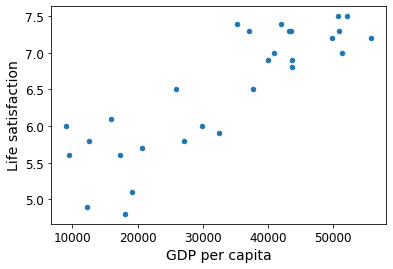

[[5.96242338]]


In [7]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

Replacing the Linear Regression model with k-Nearest Neighbors (in this example, k = 3) regression in the previous code is as simple as replacing these two
lines:

```python
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()
```

with these two:

```python
import sklearn.neighbors
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
```

In [8]:
# Select a 3-Nearest Neighbors regression model
import sklearn.neighbors
model1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# Train the model
model1.fit(X,y)

# Make a prediction for Cyprus
print(model1.predict(X_new)) # outputs [[5.76666667]]


[[5.76666667]]


In [4]:
oecd_bli

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.10,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.00,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.00,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.20,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.90,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3287,EST,Estonia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.43,NaN,NaN
3288,ISR,Israel,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.24,E,Estimated value
3289,RUS,Russia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.75,E,Estimated value
3290,SVN,Slovenia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.12,NaN,NaN


In [5]:
gdp_per_capita

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0
...,...,...,...,...,...,...,...
185,Vietnam,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",2088.344,2012.0
186,Yemen,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1302.940,2008.0
187,Zambia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1350.151,2010.0
188,Zimbabwe,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1064.350,2012.0


In [18]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

In [19]:
# Train the model
model.fit(X, y)

LinearRegression()

In [20]:
# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus's GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

[[5.96242338]]


> NOTE

>If you had used an instance-based learning algorithm instead, you would have found that Slovenia has the closest GDP per capita to that of Cyprus ($20,732), and since the OECD data tells us that Slovenians’ life satisfaction is 5.7, you would have predicted a life satisfaction of 5.7 for Cyprus. If you zoom out a bit and look at the two next-closest countries, you will find Portugal and Spain with life satisfactions of 5.1 and 6.5, respectively. Averaging these three values, you get 5.77, which is pretty close to your model-based prediction. This simple algorithm is called *k-Nearest Neighbors regression* (in this example, k = 3).

Replacing the Linear Regression model with k-Nearest Neighbors regression in the previous code is as simple as replacing these two lines:

In [21]:
import sklearn.neighbors
model = sklearn.neighbors.KNeighborsRegressor(
    n_neighbors=3)

In [22]:
# Train the model
model.fit(X, y)

KNeighborsRegressor(n_neighbors=3)

In [23]:
# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus's GDP per capita
print(model.predict(X_new))

[[5.76666667]]


In [9]:
sys.version_info

sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)

In [11]:
sklearn.__version__

'0.24.1'

If all went well, your model will make good predictions. If not, you may need to use more attributes (employment rate, health, air pollution, etc.), get more or better-quality training data, or perhaps select a more powerful model (e.g., a Polynomial Regression model).

In summary:

- You studied the data.

- You selected a model.

- You trained it on the training data (i.e., the learning algorithm searched for the model parameter values that minimize a cost function).

- Finally, you applied the model to make predictions on new cases (this is called *inference*), hoping that this model will generalize well.

This is what a typical Machine Learning project looks like. In Chapter 2 you will experience this firsthand by going through a project end to end.

We have covered a lot of ground so far: you now know what Machine Learning is really about, why it is useful, what some of the most common categories of ML systems are, and what a typical project workflow looks like. Now let’s look at what can go wrong in learning and prevent you from making accurate predictions.

**Main Challenges of Machine Learning**


In short, since your main task is to select a learning algorithm and train it on some data, the two things that can go wrong are “bad algorithm” and “bad data.” Let’s start with examples of bad data.

**Insufficient Quantity of Training Data**  


For a toddler to learn what an apple is, all it takes is for you to point to an apple and say “apple” (possibly repeating this procedure a few times). Now the child is able to recognize apples in all sorts of colors and shapes. Genius.

Machine Learning is not quite there yet; it takes a lot of data for most Machine Learning algorithms to work properly. Even for very simple problems you typically need thousands of examples, and for complex problems such as image or speech recognition you may need millions of examples (unless you can reuse parts of an existing model).

THE UNREASONABLE EFFECTIVENESS OF DATA 


In a famous paper published in 2001, Microsoft researchers Michele Banko and Eric Brill showed that very different Machine Learning algorithms, including fairly simple ones, performed almost identically well on a complex problem of natural language disambiguation once they were given enough data (as you can see in Figure 1-20).

<img src="./chapters/1/mls2_0120.png">
<div style="text-align:center"> Figure 1-20. The importance of data versus algorithms </div>

As the authors put it, “these results suggest that we may want to reconsider the trade-off between spending time and money on algorithm development versus spending it on corpus development.”

The idea that data matters more than algorithms for complex problems was further popularized by Peter Norvig et al. in a paper titled “The Unreasonable Effectiveness of Data”, published in 2009.10 It should be noted, however, that small- and medium-sized datasets are still very common, and it is not always easy or cheap to get extra training data⁠—so don’t abandon algorithms just yet.

**Nonrepresentative Training Data**  


In order to generalize well, it is crucial that your training data be representative of the new cases you want to generalize to. This is true whether you use instance-based learning or model-based learning.

For example, the set of countries we used earlier for training the linear model was not perfectly representative; a few countries were missing. Figure 1-21 shows what the data looks like when you add the missing countries.

<img src="./chapters/1/mls2_0121.png">
<div style="text-align:center"> Figure 1-21. A more representative training sample </div>

If you train a linear model on this data, you get the solid line, while the old model is represented by the dotted line. As you can see, not only does adding a few missing countries significantly alter the model, but it makes it clear that such a simple linear model is probably never going to work well. It seems that very rich countries are not happier than moderately rich countries (in fact, they seem unhappier), and conversely some poor countries seem happier than many rich countries.

By using a nonrepresentative training set, we trained a model that is unlikely to make accurate predictions, especially for very poor and very rich countries.

It is crucial to use a training set that is representative of the cases you want to generalize to. This is often harder than it sounds: if the sample is too small, you will have *sampling noise* (i.e., nonrepresentative data as a result of chance), but even very large samples can be nonrepresentative if the sampling method is flawed. This is called *sampling bias*.

>**EXAMPLES OF SAMPLING BIAS**  


> Perhaps the most famous example of sampling bias happened during the US presidential election in 1936, which pitted Landon against Roosevelt: the Literary Digest conducted a very large poll, sending mail to about 10 million people. It got 2.4 million answers, and predicted with high confidence that Landon would get 57% of the votes. Instead, Roosevelt won with 62% of the votes. The flaw was in the Literary Digest’s sampling method:

> First, to obtain the addresses to send the polls to, the Literary Digest used telephone directories, lists of magazine subscribers, club membership lists, and the like. All of these lists tended to favor wealthier people, who were more likely to vote Republican (hence Landon).

> Second, less than 25% of the people who were polled answered. Again this introduced a sampling bias, by potentially ruling out people who didn’t care much about politics, people who didn’t like the Literary Digest, and other key groups. This is a special type of sampling bias called nonresponse bias.

Here is another example: say you want to build a system to recognize funk music videos. One way to build your training set is to search for “funk music” on YouTube and use the resulting videos. But this assumes that YouTube’s search engine returns a set of videos that are representative of all the funk music videos on YouTube. In reality, the search results are likely to be biased toward popular artists (and if you live in Brazil you will get a lot of “funk carioca” videos, which sound nothing like James Brown). On the other hand, how else can you get a large training set?

**Poor-Quality Data**  


Obviously, if your training data is full of errors, outliers, and noise (e.g., due to poor-quality measurements), it will make it harder for the system to detect the underlying patterns, so your system is less likely to perform well. It is often well worth the effort to spend time cleaning up your training data. The truth is, most data scientists spend a significant part of their time doing just that. The following are a couple of examples of when you’d want to clean up training data:

- If some instances are clearly outliers, it may help to simply discard them or try to fix the errors manually.

- If some instances are missing a few features (e.g., 5% of your customers did not specify their age), you must decide whether you want to ignore this attribute altogether, ignore these instances, fill in the missing values (e.g., with the median age), or train one model with the feature and one model without it.

**Irrelevant Features**  


As the saying goes: garbage in, garbage out. Your system will only be capable of learning if the training data contains enough relevant features and not too many irrelevant ones. A critical part of the success of a Machine Learning project is coming up with a good set of features to train on. This process, called feature engineering, involves the following steps:

- Feature selection (selecting the most useful features to train on among existing features)

- Feature extraction (combining existing features to produce a more useful one⁠—as we saw earlier, dimensionality reduction algorithms can help)

- Creating new features by gathering new data

Now that we have looked at many examples of bad data, let’s look at a couple of examples of bad algorithms.

**Overfitting the Training Data**  


Say you are visiting a foreign country and the taxi driver rips you off. You might be tempted to say that all taxi drivers in that country are thieves. Overgeneralizing is something that we humans do all too often, and unfortunately machines can fall into the same trap if we are not careful. In Machine Learning this is called overfitting: it means that the model performs well on the training data, but it does not generalize well.

Figure 1-22 shows an example of a high-degree polynomial life satisfaction model that strongly overfits the training data. Even though it performs much better on the training data than the simple linear model, would you really trust its predictions?


<img src="./chapters/1/mls2_0122.png">
<div style="text-align:center"> Figure 1-22. Overfitting the training data </div>

Complex models such as deep neural networks can detect subtle patterns in the data, but if the training set is noisy, or if it is too small (which introduces sampling noise), then the model is likely to detect patterns in the noise itself. Obviously these patterns will not generalize to new instances. For example, say you feed your life satisfaction model many more attributes, including uninformative ones such as the country’s name. In that case, a complex model may detect patterns like the fact that all countries in the training data with a w in their name have a life satisfaction greater than 7: New Zealand (7.3), Norway (7.4), Sweden (7.2), and Switzerland (7.5). How confident are you that the w-satisfaction rule generalizes to Rwanda or Zimbabwe? Obviously this pattern occurred in the training data by pure chance, but the model has no way to tell whether a pattern is real or simply the result of noise in the data.

Constraining a model to make it simpler and reduce the risk of overfitting is called regularization. For example, the linear model we defined earlier has two parameters, $\theta_0$ and $\theta_1$. This gives the learning algorithm two degrees of freedom to adapt the model to the training data: it can tweak both the height ($\theta_0$) and the slope ($\theta_1$) of the line. If we forced $\theta_1 = 0$, the algorithm would have only one degree of freedom and would have a much harder time fitting the data properly: all it could do is move the line up or down to get as close as possible to the training instances, so it would end up around the mean. A very simple model indeed! If we allow the algorithm to modify $\theta_1$ but we force it to keep it small, then the learning algorithm will effectively have somewhere in between one and two degrees of freedom. It will produce a model that’s simpler than one with two degrees of freedom, but more complex than one with just one. You want to find the right balance between fitting the training data perfectly and keeping the model simple enough to ensure that it will generalize well.

Figure 1-23 shows three models. The dotted line represents the original model that was trained on the countries represented as circles (without the countries represented as squares), the dashed line is our second model trained with all countries (circles and squares), and the solid line is a model trained with the same data as the first model but with a regularization constraint. You can see that regularization forced the model to have a smaller slope: this model does not fit the training data (circles) as well as the first model, but it actually generalizes better to new examples that it did not see during training (squares). 

<img src="./chapters/1/mls2_0123.png">
<div style="text-align:center"> Figure 1-23. Regularization reduces the risk of overfitting </div>

The amount of regularization to apply during learning can be controlled by a *hyperparameter*. A hyperparameter is a parameter of a learning algorithm (not of the model). As such, it is not affected by the learning algorithm itself; it must be set prior to training and remains constant during training. If you set the regularization hyperparameter to a very large value, you will get an almost flat model (a slope close to zero); the learning algorithm will almost certainly not overfit the training data, but it will be less likely to find a good solution. Tuning hyperparameters is an important part of building a Machine Learning system (you will see a detailed example in the next chapter).

**Underfitting the Training Data**  

As you might guess, *underfitting* is the opposite of overfitting: it occurs when your model is too simple to learn the underlying structure of the data. For example, a linear model of life satisfaction is prone to underfit; reality is just more complex than the model, so its predictions are bound to be inaccurate, even on the training examples.

Here are the main options for fixing this problem:

- Select a more powerful model, with more parameters.

- Feed better features to the learning algorithm (feature engineering).

- Reduce the constraints on the model (e.g., reduce the regularization hyperparameter).

**Stepping Back**  


By now you know a lot about Machine Learning. However, we went through so many concepts that you may be feeling a little lost, so let’s step back and look at the big picture:

- Machine Learning is about making machines get better at some task by learning from data, instead of having to explicitly code rules.

- There are many different types of ML systems: supervised or not, batch or online, instance-based or model-based.

- In an ML project you gather data in a training set, and you feed the training set to a learning algorithm. If the algorithm is model-based, it tunes some parameters to fit the model to the training set (i.e., to make good predictions on the training set itself), and then hopefully it will be able to make good predictions on new cases as well. If the algorithm is instance-based, it just learns the examples by heart and generalizes to new instances by using a similarity measure to compare them to the learned instances.

- The system will not perform well if your training set is too small, or if the data is not representative, is noisy, or is polluted with irrelevant features (garbage in, garbage out). Lastly, your model needs to be neither too simple (in which case it will underfit) nor too complex (in which case it will overfit).

There’s just one last important topic to cover: once you have trained a model, you don’t want to just “hope” it generalizes to new cases. You want to evaluate it and fine-tune it if necessary. Let’s see how to do that.

**Testing and Validating**  

The only way to know how well a model will generalize to new cases is to actually try it out on new cases. One way to do that is to put your model in production and monitor how well it performs. This works well, but if your model is horribly bad, your users will complain—not the best idea.

A better option is to split your data into two sets: the *training set* and the *test set*. As these names imply, you train your model using the training set, and you test it using the test set. The error rate on new cases is called the *generalization error* (or *out-of-sample error*), and by evaluating your model on the test set, you get an estimate of this error. This value tells you how well your model will perform on instances it has never seen before.

If the training error is low (i.e., your model makes few mistakes on the training set) but the generalization error is high, it means that your model is overfitting the training data.

>TIP


>It is common to use 80% of the data for training and hold out 20% for testing. However, this depends on the size of the dataset: if it contains 10 million instances, then holding out 1% means your test set will contain 100,000 instances, probably more than enough to get a good estimate of the generalization error.

**Hyperparameter Tuning and Model Selection** 


Evaluating a model is simple enough: just use a test set. But suppose you are hesitating between two types of models (say, a linear model and a polynomial model): how can you decide between them? One option is to train both and compare how well they generalize using the test set.

Now suppose that the linear model generalizes better, but you want to apply some regularization to avoid overfitting. The question is, how do you choose the value of the regularization hyperparameter? One option is to train 100 different models using 100 different values for this hyperparameter. Suppose you find the best hyperparameter value that produces a model with the lowest generalization error⁠—say, just 5% error. You launch this model into production, but unfortunately it does not perform as well as expected and produces 15% errors. What just happened?

The problem is that you measured the generalization error multiple times on the test set, and you adapted the model and hyperparameters to produce the best model *for that particular set*. This means that the model is unlikely to perform as well on new data.

A common solution to this problem is called *holdout validation*: you simply hold out part of the training set to evaluate several candidate models and select the best one. The new held-out set is called the *validation set* (or sometimes the *development set*, or *dev set*). More specifically, you train multiple models with various hyperparameters on the reduced training set (i.e., the full training set minus the validation set), and you select the model that performs best on the validation set. After this holdout validation process, you train the best model on the full training set (including the validation set), and this gives you the final model. Lastly, you evaluate this final model on the test set to get an estimate of the generalization error.

This solution usually works quite well. However, if the validation set is too small, then model evaluations will be imprecise: you may end up selecting a suboptimal model by mistake. Conversely, if the validation set is too large, then the remaining training set will be much smaller than the full training set. Why is this bad? Well, since the final model will be trained on the full training set, it is not ideal to compare candidate models trained on a much smaller training set. It would be like selecting the fastest sprinter to participate in a marathon. One way to solve this problem is to perform repeated *cross-validation*, using many small validation sets. Each model is evaluated once per validation set after it is trained on the rest of the data. By averaging out all the evaluations of a model, you get a much more accurate measure of its performance. There is a drawback, however: the training time is multiplied by the number of validation sets.

**Data Mismatch**  


In some cases, it’s easy to get a large amount of data for training, but this data probably won’t be perfectly representative of the data that will be used in production. For example, suppose you want to create a mobile app to take pictures of flowers and automatically determine their species. You can easily download millions of pictures of flowers on the web, but they won’t be perfectly representative of the pictures that will actually be taken using the app on a mobile device. Perhaps you only have 10,000 representative pictures (i.e., actually taken with the app). In this case, the most important rule to remember is that the validation set and the test set must be as representative as possible of the data you expect to use in production, so they should be composed exclusively of representative pictures: you can shuffle them and put half in the validation set and half in the test set (making sure that no duplicates or near-duplicates end up in both sets). But after training your model on the web pictures, if you observe that the performance of the model on the validation set is disappointing, you will not know whether this is because your model has overfit the training set, or whether this is just due to the mismatch between the web pictures and the mobile app pictures. One solution is to hold out some of the training pictures (from the web) in yet another set that Andrew Ng calls the *train-dev set*. After the model is trained (on the training set, not on the train-dev set), you can evaluate it on the train-dev set. If it performs well, then the model is not overfitting the training set. If it performs poorly on the validation set, the problem must be coming from the data mismatch. You can try to tackle this problem by preprocessing the web images to make them look more like the pictures that will be taken by the mobile app, and then retraining the model. Conversely, if the model performs poorly on the train-dev set, then it must have overfit the training set, so you should try to simplify or regularize the model, get more training data, and clean up the training data.

Create a function to save the figures.

In [12]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Make this notebook's output stable across runs:

In [13]:
np.random.seed(42)

# Load and prepare Life satisfaction data

If you want, you can get fresh data from the OECD's website.
Download the CSV from http://stats.oecd.org/index.aspx?DataSetCode=BLI
and save it to `datasets/lifesat/`.

In [14]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head(2)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0


In [15]:
oecd_bli["Life satisfaction"].head()

Country
Australia    7.3
Austria      6.9
Belgium      6.9
Brazil       7.0
Canada       7.3
Name: Life satisfaction, dtype: float64

# Load and prepare GDP per capita data

Just like above, you can update the GDP per capita data if you want. Just download data from http://goo.gl/j1MSKe (=> imf.org) and save it to `datasets/lifesat/`.

In [16]:
gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head(2)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0


In [17]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
full_country_stats

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0
Poland,33.0,1.4,10.8,3.2,90.0,7.41,60.0,0.9,17852.0,10919.0,...,14.20,55.0,79.0,18.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12495.334,2014.0
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,14.41,49.0,73.0,16.5,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13340.905,2014.0
Slovak Republic,13.0,3.0,6.6,0.6,92.0,7.02,60.0,1.2,17503.0,8663.0,...,14.99,59.0,81.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",15991.736,2015.0
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,14.98,59.0,85.0,18.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",17256.918,2015.0


In [18]:
full_country_stats[["GDP per capita", 'Life satisfaction']].loc["United States"]

GDP per capita       55805.204
Life satisfaction        7.200
Name: United States, dtype: float64

In [19]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

Saving figure money_happy_scatterplot


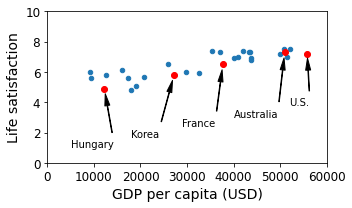

In [20]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
plt.xlabel("GDP per capita (USD)")
save_fig('money_happy_scatterplot')
plt.show()

In [21]:
sample_data.to_csv(os.path.join("datasets", "lifesat", "lifesat.csv"))

In [22]:
sample_data.loc[list(position_text.keys())]

,GDP per capita,Life satisfaction
Country,,
Hungary,12239.894,4.9
Korea,27195.197,5.8
France,37675.006,6.5
Australia,50961.865,7.3
United States,55805.204,7.2


Saving figure tweaking_model_params_plot


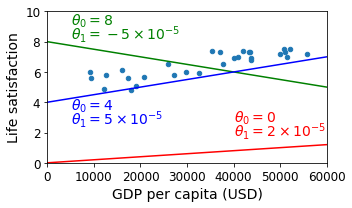

In [23]:
import numpy as np

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, 2*X/100000, "r")
plt.text(40000, 2.7, r"$\theta_0 = 0$", fontsize=14, color="r")
plt.text(40000, 1.8, r"$\theta_1 = 2 \times 10^{-5}$", fontsize=14, color="r")
plt.plot(X, 8 - 5*X/100000, "g")
plt.text(5000, 9.1, r"$\theta_0 = 8$", fontsize=14, color="g")
plt.text(5000, 8.2, r"$\theta_1 = -5 \times 10^{-5}$", fontsize=14, color="g")
plt.plot(X, 4 + 5*X/100000, "b")
plt.text(5000, 3.5, r"$\theta_0 = 4$", fontsize=14, color="b")
plt.text(5000, 2.6, r"$\theta_1 = 5 \times 10^{-5}$", fontsize=14, color="b")
save_fig('tweaking_model_params_plot')
plt.show()

In [27]:
sample_data["GDP per capita"], sample_data["Life satisfaction"]

(Country
 Russia              9054.914
 Turkey              9437.372
 Hungary            12239.894
 Poland             12495.334
 Slovak Republic    15991.736
 Estonia            17288.083
 Greece             18064.288
 Portugal           19121.592
 Slovenia           20732.482
 Spain              25864.721
 Korea              27195.197
 Italy              29866.581
 Japan              32485.545
 Israel             35343.336
 New Zealand        37044.891
 France             37675.006
 Belgium            40106.632
 Germany            40996.511
 Finland            41973.988
 Canada             43331.961
 Netherlands        43603.115
 Austria            43724.031
 United Kingdom     43770.688
 Sweden             49866.266
 Iceland            50854.583
 Australia          50961.865
 Ireland            51350.744
 Denmark            52114.165
 United States      55805.204
 Name: GDP per capita, dtype: float64,
 Country
 Russia             6.0
 Turkey             5.6
 Hungary            4.9
 

In [24]:
from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0, t1

(4.853052800266436, 4.911544589158484e-05)

Saving figure best_fit_model_plot


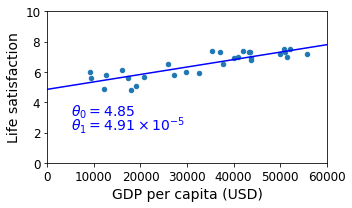

In [28]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
save_fig('best_fit_model_plot')
plt.show()

In [29]:
cyprus_gdp_per_capita = gdp_per_capita.loc["Cyprus"]["GDP per capita"]
print(cyprus_gdp_per_capita)
cyprus_predicted_life_satisfaction = lin1.predict([[cyprus_gdp_per_capita]])[0][0]
cyprus_predicted_life_satisfaction

22587.49


5.96244744318815

Saving figure cyprus_prediction_plot


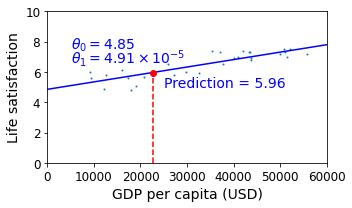

In [30]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3), s=1)
plt.xlabel("GDP per capita (USD)")
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.axis([0, 60000, 0, 10])
plt.text(5000, 7.5, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 6.6, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita], [0, cyprus_predicted_life_satisfaction], "r--")
plt.text(25000, 5.0, r"Prediction = 5.96", fontsize=14, color="b")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")
save_fig('cyprus_prediction_plot')
plt.show()

In [31]:
sample_data[7:10]

,GDP per capita,Life satisfaction
Country,,
Portugal,19121.592,5.1
Slovenia,20732.482,5.7
Spain,25864.721,6.5


In [32]:
(5.1+5.7+6.5)/3

5.766666666666667

In [33]:
backup = oecd_bli, gdp_per_capita

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

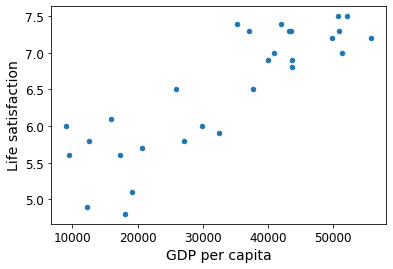

[[5.96242338]]


In [34]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

In [35]:
oecd_bli, gdp_per_capita = backup

In [36]:
missing_data

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4
Switzerland,80675.308,7.5
Luxembourg,101994.093,6.9


In [37]:
position_text2 = {
    "Brazil": (1000, 9.0),
    "Mexico": (11000, 9.0),
    "Chile": (25000, 9.0),
    "Czech Republic": (35000, 9.0),
    "Norway": (60000, 3),
    "Switzerland": (72000, 3.0),
    "Luxembourg": (90000, 3.0),
}

Saving figure representative_training_data_scatterplot


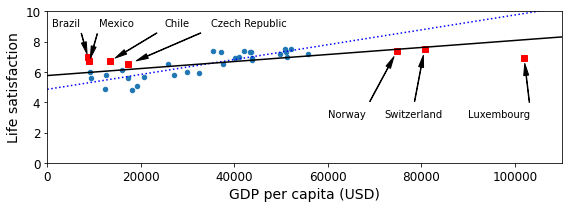

In [38]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

for country, pos_text in position_text2.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X=np.linspace(0, 110000, 1000)
plt.plot(X, t0 + t1*X, "b:")

lin_reg_full = linear_model.LinearRegression()
Xfull = np.c_[full_country_stats["GDP per capita"]]
yfull = np.c_[full_country_stats["Life satisfaction"]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "k")
plt.xlabel("GDP per capita (USD)")

save_fig('representative_training_data_scatterplot')
plt.show()

Saving figure overfitting_model_plot


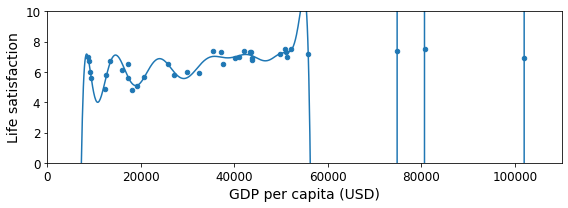

In [39]:
full_country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

from sklearn import preprocessing
from sklearn import pipeline

poly = preprocessing.PolynomialFeatures(degree=30, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)
plt.xlabel("GDP per capita (USD)")
save_fig('overfitting_model_plot')
plt.show()

In [40]:
full_country_stats.loc[[c for c in full_country_stats.index if "W" in c.upper()]]["Life satisfaction"]

Country
New Zealand    7.3
Sweden         7.2
Norway         7.4
Switzerland    7.5
Name: Life satisfaction, dtype: float64

In [41]:
gdp_per_capita.loc[[c for c in gdp_per_capita.index if "W" in c.upper()]].head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Botswana,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",6040.957,2008.0
Kuwait,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",29363.027,2014.0
Malawi,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",354.275,2011.0
New Zealand,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",37044.891,2015.0
Norway,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",74822.106,2015.0


Saving figure ridge_model_plot


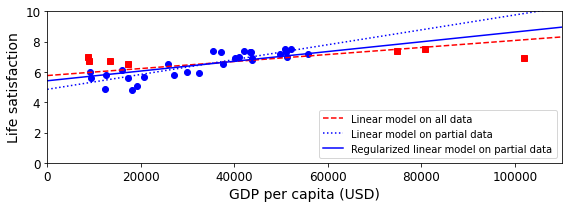

In [42]:
plt.figure(figsize=(8,3))

plt.xlabel("GDP per capita")
plt.ylabel('Life satisfaction')

plt.plot(list(sample_data["GDP per capita"]), list(sample_data["Life satisfaction"]), "bo")
plt.plot(list(missing_data["GDP per capita"]), list(missing_data["Life satisfaction"]), "rs")

X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "r--", label="Linear model on all data")
plt.plot(X, t0 + t1*X, "b:", label="Linear model on partial data")

ridge = linear_model.Ridge(alpha=10**9.5)
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
ridge.fit(Xsample, ysample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]
plt.plot(X, t0ridge + t1ridge * X, "b", label="Regularized linear model on partial data")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])
plt.xlabel("GDP per capita (USD)")
save_fig('ridge_model_plot')
plt.show()

## Exercises  

In this chapter we have covered some of the most important concepts in Machine Learning. In the next chapters we will dive deeper and write more code, but before we do, make sure you know how to answer the following questions:

1. How would you define Machine Learning?

>Machine Learning is about building systems that can learn from data. Learning means getting better at some task, given some performance measure.

2. Can you name four types of problems where it shines?

>Machine Learning is great for complex problems for which we have no algorithmic solution, to replace long lists of hand-tuned rules, to build systems that adapt to fluctuating environments, and finally to help humans learn (e.g., data mining).

3. What is a labeled training set?

>A labeled training set is a training set that contains the desired solution (a.k.a. a label) for each instance.


4. What are the two most common supervised tasks?

>The two most common supervised tasks are regression and classification.

5. Can you name four common unsupervised tasks?

>Common unsupervised tasks include clustering, visualization, dimensionality reduction, and association rule learning.

6. What type of Machine Learning algorithm would you use to allow a robot to walk in various unknown terrains?

>Reinforcement Learning is likely to perform best if we want a robot to learn to walk in various unknown terrains, since this is typically the type of problem that Reinforcement Learning tackles. It might be possible to express the problem as a supervised or semisupervised learning problem, but it would be less natural.

7. What type of algorithm would you use to segment your customers into multiple groups?

>If you don’t know how to define the groups, then you can use a clustering algorithm (unsupervised learning) to segment your customers into clusters of similar customers. However, if you know what groups you would like to have, then you can feed many examples of each group to a classification algorithm (supervised learning), and it will classify all your customers into these groups.


8. Would you frame the problem of spam detection as a supervised learning problem or an unsupervised learning problem?

> Spam detection is a typical supervised learning problem: the algorithm is fed many emails along with their labels (spam or not spam).


9. What is an online learning system?

> An online learning system can learn incrementally, as opposed to a batch learning system. This makes it capable of adapting rapidly to both changing data and autonomous systems, and of training on very large quantities of data.


10. What is out-of-core learning?

>Out-of-core algorithms can handle vast quantities of data that cannot fit in a computer’s main memory. An out-of-core learning algorithm chops the data into mini-batches and uses online learning techniques to learn from these mini-batches.

11. What type of learning algorithm relies on a similarity measure to make predictions?

>An instance-based learning system learns the training data by heart; then, when given a new instance, it uses a similarity measure to find the most similar learned instances and uses them to make predictions.


12. What is the difference between a model parameter and a learning algorithm’s hyperparameter?

>A model has one or more model parameters that determine what it will predict given a new instance (e.g., the slope of a linear model). A learning algorithm tries to find optimal values for these parameters such that the model generalizes well to new instances. A hyperparameter is a parameter of the learning algorithm itself, not of the model (e.g., the amount of regularization to apply).

13. What do model-based learning algorithms search for? What is the most common strategy they use to succeed? How do they make predictions?

> Model-based learning algorithms search for an optimal value for the model parameters such that the model will generalize well to new instances. We usually train such systems by minimizing a cost function that measures how bad the system is at making predictions on the training data, plus a penalty for model complexity if the model is regularized. To make predictions, we feed the new instance’s features into the model’s prediction function, using the parameter values found by the learning algorithm.


14. Can you name four of the main challenges in Machine Learning?

>Some of the main challenges in Machine Learning are the lack of data, poor data quality, nonrepresentative data, uninformative features, excessively simple models that underfit the training data, and excessively complex models that overfit the data.


15. If your model performs great on the training data but generalizes poorly to new instances, what is happening? Can you name three possible solutions?

> If a model performs great on the training data but generalizes poorly to new instances, the model is likely overfitting the training data (or we got extremely lucky on the training data). Possible solutions to overfitting are getting more data, simplifying the model (selecting a simpler algorithm, reducing the number of parameters or features used, or regularizing the model), or reducing the noise in the training data.

16. What is a test set, and why would you want to use it?

> A test set is used to estimate the generalization error that a model will make on new instances, before the model is launched in production.


17. What is the purpose of a validation set?

>A validation set is used to compare models. It makes it possible to select the best model and tune the hyperparameters.

18. What is the train-dev set, when do you need it, and how do you use it?

>The train-dev set is used when there is a risk of mismatch between the training data and the data used in the validation and test datasets (which should always be as close as possible to the data used once the model is in production). The train-dev set is a part of the training set that’s held out (the model is not trained on it). The model is trained on the rest of the training set, and evaluated on both the train-dev set and the validation set. If the model performs well on the training set but not on the train-dev set, then the model is likely overfitting the training set. If it performs well on both the training set and the train-dev set, but not on the validation set, then there is probably a significant data mismatch between the training data and the validation + test data, and you should try to improve the training data to make it look more like the validation + test data.

19. What can go wrong if you tune hyperparameters using the test set?

>If you tune hyperparameters using the test set, you risk overfitting the test set, and the generalization error you measure will be optimistic (you may launch a model that performs worse than you expect).

This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data. It's a bit too long and boring and it's not specific to Machine Learning, which is why I left it out of the book.

In [1]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [2]:
import os
datapath = os.path.join("handson-ml2", "datasets", "lifesat")

In [3]:
# To plot pretty figures directly within Jupyter
#%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
# Download the data
import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [6]:
# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

In [7]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


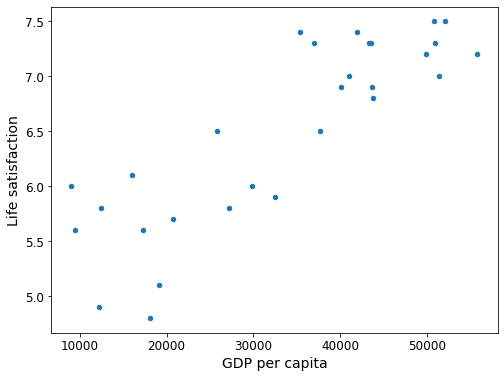

In [14]:
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize = (8,6))
plt.show()

In [15]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

In [16]:
# Train the model
model.fit(X, y)

LinearRegression()

In [17]:
# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

[[5.96242338]]


Create a function to save the figures.

In [25]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Make this notebook's output stable across runs:

In [34]:
np.random.seed(42)

**Load and prepare Life satisfaction data** 

If you want, you can get fresh data from the OECD's website.
Download the CSV from http://stats.oecd.org/index.aspx?DataSetCode=BLI
and save it to `datasets/lifesat/`.

In [18]:
datapath = './handson-ml2/datasets/lifesat/'
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head(2)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0


In [19]:
oecd_bli["Life satisfaction"].head()

Country
Australia    7.3
Austria      6.9
Belgium      6.9
Brazil       7.0
Canada       7.3
Name: Life satisfaction, dtype: float64

**Load and prepare GDP per capita data**

Just like above, you can update the GDP per capita data if you want. Just download data from http://goo.gl/j1MSKe (=> imf.org) and save it to `datasets/lifesat/`.

In [20]:
gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head(2)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0


In [21]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
full_country_stats.head(2)

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0


In [22]:
full_country_stats[["GDP per capita", 'Life satisfaction']].loc["United States"]

GDP per capita       55805.204
Life satisfaction        7.200
Name: United States, dtype: float64

In [23]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

Saving figure money_happy_scatterplot


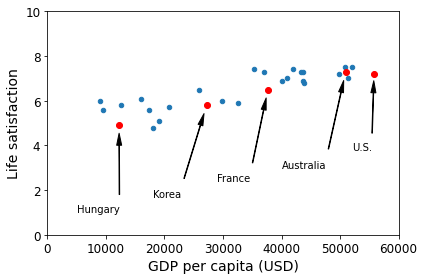

In [27]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(6,4))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
plt.xlabel("GDP per capita (USD)")
save_fig('money_happy_scatterplot')
plt.show()

In [47]:
sample_data.to_csv(os.path.join("./handson-ml2/datasets", "lifesat", "lifesat.csv"))

In [48]:
sample_data.loc[list(position_text.keys())]

,GDP per capita,Life satisfaction
Country,,
Hungary,12239.894,4.9
Korea,27195.197,5.8
France,37675.006,6.5
Australia,50961.865,7.3
United States,55805.204,7.2


Saving figure tweaking_model_params_plot


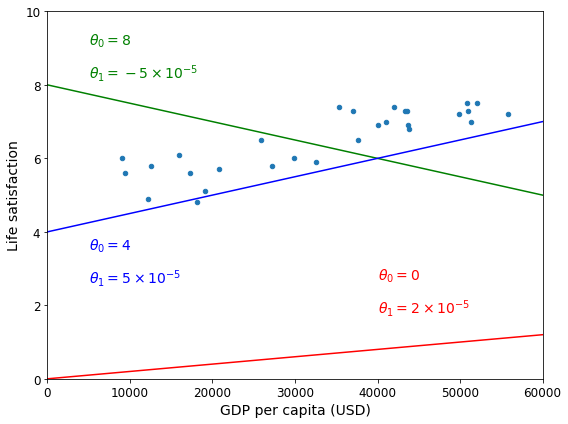

In [29]:
import numpy as np

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,6))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, 2*X/100000, "r")
plt.text(40000, 2.7, r"$\theta_0 = 0$", fontsize=14, color="r")
plt.text(40000, 1.8, r"$\theta_1 = 2 \times 10^{-5}$", fontsize=14, color="r")
plt.plot(X, 8 - 5*X/100000, "g")
plt.text(5000, 9.1, r"$\theta_0 = 8$", fontsize=14, color="g")
plt.text(5000, 8.2, r"$\theta_1 = -5 \times 10^{-5}$", fontsize=14, color="g")
plt.plot(X, 4 + 5*X/100000, "b")
plt.text(5000, 3.5, r"$\theta_0 = 4$", fontsize=14, color="b")
plt.text(5000, 2.6, r"$\theta_1 = 5 \times 10^{-5}$", fontsize=14, color="b")
save_fig('tweaking_model_params_plot')
plt.show()

In [30]:
from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0, t1

(4.853052800266435, 4.911544589158485e-05)

Saving figure best_fit_model_plot


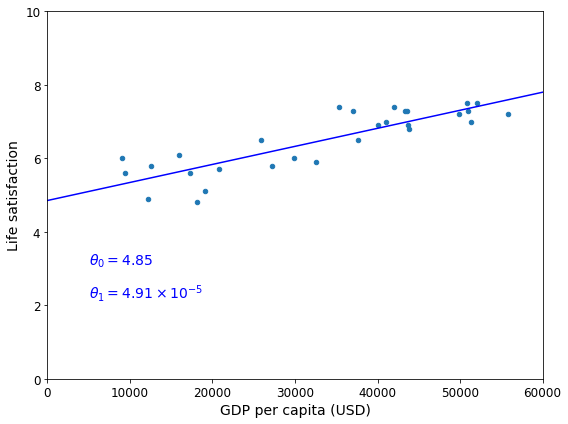

In [31]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,6))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
save_fig('best_fit_model_plot')
plt.show()


In [32]:
cyprus_gdp_per_capita = gdp_per_capita.loc["Cyprus"]["GDP per capita"]
print(cyprus_gdp_per_capita)
cyprus_predicted_life_satisfaction = lin1.predict([[cyprus_gdp_per_capita]])[0][0]
cyprus_predicted_life_satisfaction

22587.49


5.962447443188149

Saving figure cyprus_prediction_plot


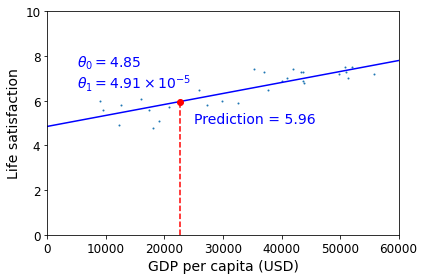

In [34]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(6,4), s=1)
plt.xlabel("GDP per capita (USD)")
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.axis([0, 60000, 0, 10])
plt.text(5000, 7.5, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 6.6, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita], [0, cyprus_predicted_life_satisfaction], "r--")
plt.text(25000, 5.0, r"Prediction = 5.96", fontsize=14, color="b")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")
save_fig('cyprus_prediction_plot')
plt.show()

In [35]:
sample_data[7:10]

,GDP per capita,Life satisfaction
Country,,
Portugal,19121.592,5.1
Slovenia,20732.482,5.7
Spain,25864.721,6.5


In [36]:
(5.1+5.7+6.5)/3

5.766666666666667

In [37]:
backup = oecd_bli, gdp_per_capita

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

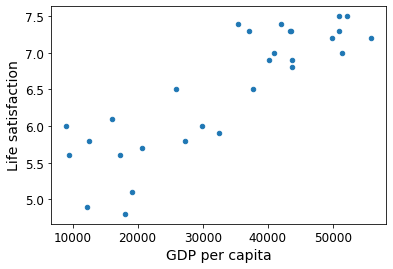

[[5.96242338]]


In [38]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
datapath = "./handson-ml2/datasets/lifesat/"
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

In [39]:
oecd_bli, gdp_per_capita = backup

In [40]:
missing_data

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4
Switzerland,80675.308,7.5
Luxembourg,101994.093,6.9


In [41]:
position_text2 = {
    "Brazil": (1000, 9.0),
    "Mexico": (11000, 9.0),
    "Chile": (25000, 9.0),
    "Czech Republic": (35000, 9.0),
    "Norway": (60000, 3),
    "Switzerland": (72000, 3.0),
    "Luxembourg": (90000, 3.0),
}

In [46]:
position_text2.items()

dict_items([('Brazil', (1000, 9.0)), ('Mexico', (11000, 9.0)), ('Chile', (25000, 9.0)), ('Czech Republic', (35000, 9.0)), ('Norway', (60000, 3)), ('Switzerland', (72000, 3.0)), ('Luxembourg', (90000, 3.0))])

Saving figure representative_training_data_scatterplot


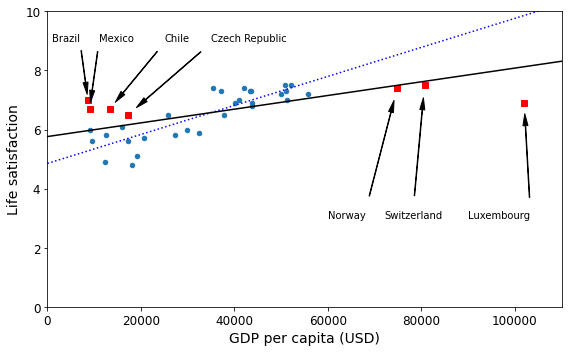

In [44]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,5))
plt.axis([0, 110000, 0, 10])

for country, pos_text in position_text2.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X=np.linspace(0, 110000, 1000)
plt.plot(X, t0 + t1*X, "b:")

lin_reg_full = linear_model.LinearRegression()
Xfull = np.c_[full_country_stats["GDP per capita"]]
yfull = np.c_[full_country_stats["Life satisfaction"]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "k")
plt.xlabel("GDP per capita (USD)")

save_fig('representative_training_data_scatterplot')
plt.show()

/home/dan/miniconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
/home/dan/miniconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Saving figure overfitting_model_plot


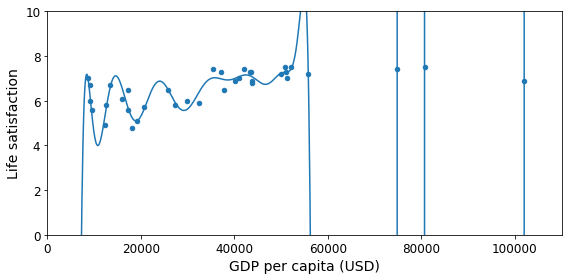

In [47]:
full_country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,4))
plt.axis([0, 110000, 0, 10])

from sklearn import preprocessing
from sklearn import pipeline

poly = preprocessing.PolynomialFeatures(degree=60, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)
plt.xlabel("GDP per capita (USD)")
save_fig('overfitting_model_plot')
plt.show()

In [48]:
full_country_stats.loc[[c for c in full_country_stats.index if "W" in c.upper()]]["Life satisfaction"]

Country
New Zealand    7.3
Sweden         7.2
Norway         7.4
Switzerland    7.5
Name: Life satisfaction, dtype: float64

In [49]:
gdp_per_capita.loc[[c for c in gdp_per_capita.index if "W" in c.upper()]].head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Botswana,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",6040.957,2008.0
Kuwait,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",29363.027,2014.0
Malawi,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",354.275,2011.0
New Zealand,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",37044.891,2015.0
Norway,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",74822.106,2015.0


Saving figure ridge_model_plot


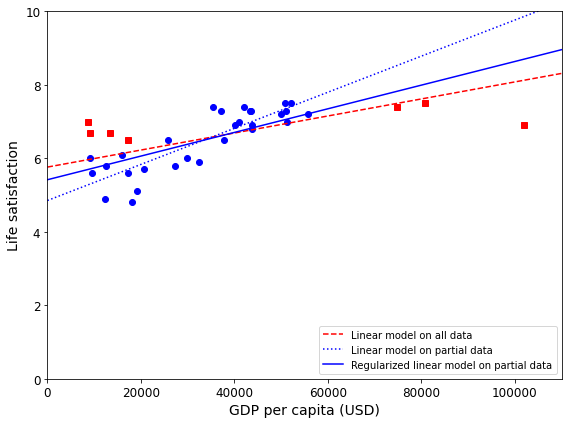

In [51]:
plt.figure(figsize=(8,6))

plt.xlabel("GDP per capita")
plt.ylabel('Life satisfaction')

plt.plot(list(sample_data["GDP per capita"]), list(sample_data["Life satisfaction"]), "bo")
plt.plot(list(missing_data["GDP per capita"]), list(missing_data["Life satisfaction"]), "rs")

X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "r--", label="Linear model on all data")
plt.plot(X, t0 + t1*X, "b:", label="Linear model on partial data")

ridge = linear_model.Ridge(alpha=10**9.5)
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
ridge.fit(Xsample, ysample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]
plt.plot(X, t0ridge + t1ridge * X, "b", label="Regularized linear model on partial data")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])
plt.xlabel("GDP per capita (USD)")
save_fig('ridge_model_plot')
plt.show()

In [52]:
backup = oecd_bli, gdp_per_capita

def prepare_country_stats(oecd_bli, gdp_per_capita):
    return sample_data

In [53]:
# Replace this linear model:
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()

In [54]:
# with this k-neighbors regression model:
import sklearn.neighbors
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [55]:
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = np.array([[22587.0]])  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.76666667]]

[[5.76666667]]
